In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Exited'])
y=df.Exited
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
x_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-08-08 16:53:50.583726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 16:53:50.583841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 16:53:50.715204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model = Sequential()

In [22]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6351 - loss: 0.6519 - val_accuracy: 0.8056 - val_loss: 0.4517
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.4402 - val_accuracy: 0.8131 - val_loss: 0.4271
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8297 - loss: 0.4085 - val_accuracy: 0.8156 - val_loss: 0.4186
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.4055 - val_accuracy: 0.8206 - val_loss: 0.4101
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8380 - loss: 0.3963 - val_accuracy: 0.8206 - val_loss: 0.4037
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.3930 - val_accuracy: 0.8325 - val_loss: 0.3949
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8307 - loss: 0.4001 - val_accuracy: 0.8369 - val_loss: 0.3893
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8351 - loss: 0.3967 - val_accu

In [26]:
model.layers[0].get_weights()

[array([[ 3.46041262e-01, -3.51729691e-01,  5.99951148e-02,
         -8.33369941e-02, -8.83048177e-01,  2.57734686e-01,
          1.95098042e-01, -1.06690951e-01,  1.00270621e-01,
         -2.67469161e-03,  2.19569635e-02],
        [-2.23144919e-01, -2.04895809e-01, -6.21795356e-01,
          8.80011797e-01, -2.32748184e-02,  1.71831310e-01,
          5.02857685e-01, -1.12961166e-01, -4.87571836e-01,
          9.52849269e-01,  1.94275424e-01],
        [-3.45988095e-01,  3.57818186e-01, -1.17305614e-01,
          1.59594089e-01,  3.10015470e-01,  7.82702327e-01,
         -3.39724183e-01, -9.77281183e-02, -7.09332004e-02,
          9.93790030e-02, -2.86643375e-02],
        [-5.58881164e-02, -8.51668239e-01,  1.11629225e-01,
         -4.36386392e-02,  3.30158204e-01, -2.03450516e-01,
         -6.98598266e-01, -1.32941827e-01,  1.29289925e-01,
          2.70567179e-01,  3.34364057e-01],
        [-1.35839075e-01,  1.24642201e-01,  2.79375799e-02,
          1.27022251e-01, -5.56713827e-02,  

In [27]:
model.layers[1].get_weights()

[array([[ 0.3747198 , -0.34979153,  0.276249  , -0.5474066 , -0.6728746 ,
         -0.06109929,  0.44214   , -0.63014054, -0.18915524,  0.02947352,
         -0.15684554],
        [ 0.43574813, -0.13867259,  0.54901004,  0.32489523,  0.46687442,
         -0.19595519,  0.13851035,  0.18756525,  0.53202665,  0.19082758,
         -0.97092575],
        [ 0.17205912, -0.96371526, -0.22264849,  0.28179145, -0.29542264,
          0.3912375 ,  0.49824387,  0.61284983,  0.09315742, -1.0247667 ,
         -0.39056435],
        [ 0.571463  , -0.511863  , -0.12023786,  0.32676074, -0.42646202,
         -0.5987206 , -0.47110644,  0.52002084,  0.52365637, -0.05781445,
         -0.25372368],
        [ 0.56931293,  0.0486711 , -0.30348238,  0.02550025, -0.39905602,
         -1.2542626 ,  0.19944088, -0.17207319,  0.48169225, -0.59044576,
          0.1017588 ],
        [ 0.44406593,  0.24995247,  0.02419415,  0.5011791 ,  0.26853845,
          0.6056901 ,  0.18980105, -0.3756041 ,  0.07842433, -0.4215115

In [28]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_log

array([[0.04370301],
       [0.05705393],
       [0.03644434],
       ...,
       [0.00834384],
       [0.03643782],
       [0.3662256 ]], dtype=float32)

In [30]:
y_pred= np.where(y_log>0.5,1,0)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.8625

In [33]:
import matplotlib.pyplot as plt

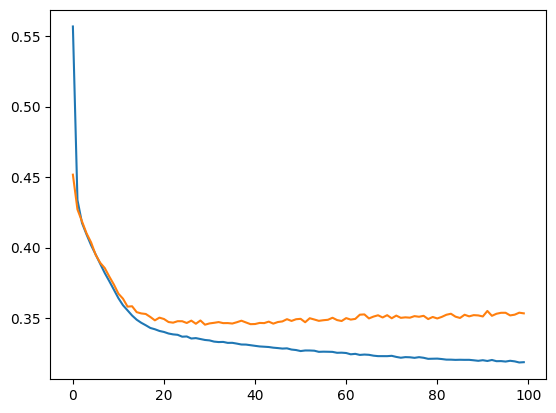

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

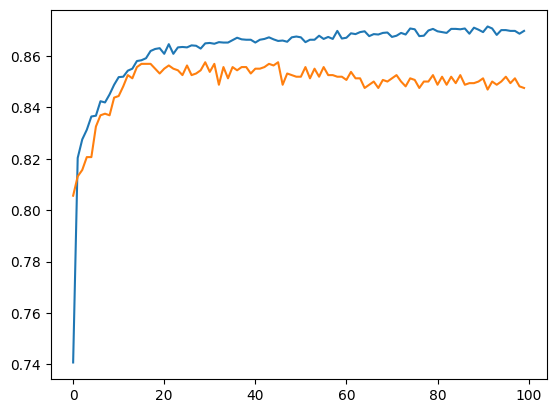

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])